In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value'] = df_comp.spx

In [4]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## White noise

A sequence of random data, where every value has a time-period associated with it


In [5]:
# Generate white noise data and plot its value
# Plotting the graph of the S&P closing prices and compare the two

# white noise is going to be generated randomly with location from spx mean and scale from spx std
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))

In [6]:
df['wn'] = wn

<ipython-input-6-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [7]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1093.057640
std,292.559287,295.010981
min,438.920000,75.300845
25%,914.620000,894.522662
50%,1144.650000,1091.282711
75%,1316.280729,1289.272175
max,1570.252238,2201.952826


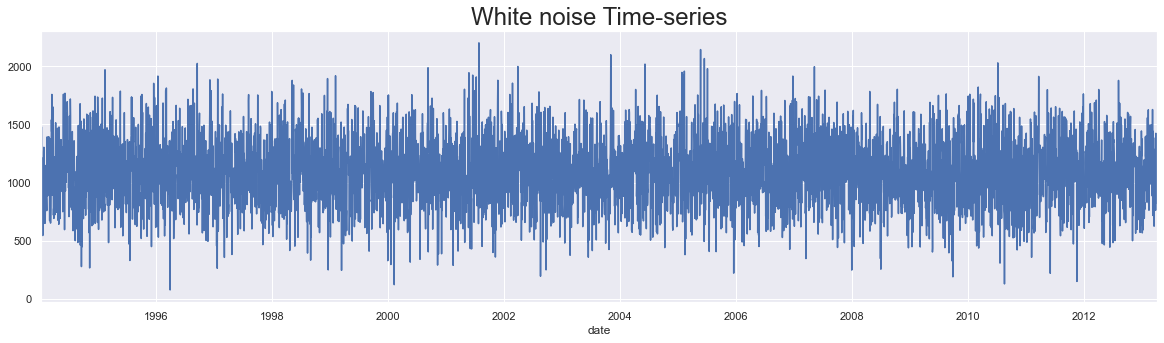

In [8]:
df.wn.plot(figsize=(20, 5))
plt.title('White noise Time-series', size=24)
plt.show()

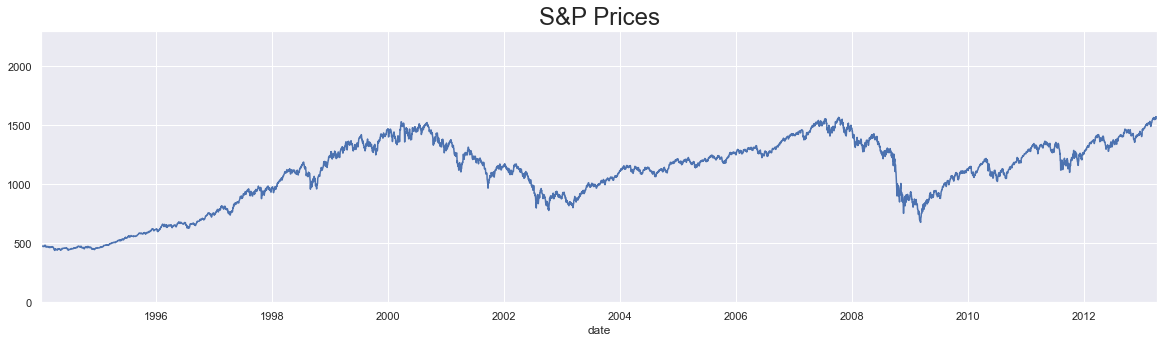

In [9]:
df.market_value.plot(figsize=(20, 5))
plt.title('S&P Prices', size=24)
plt.ylim(0,2300)
plt.show()

## Random walk in Time-series

A special type where values tend to persist over time and the differences between periods are simply white noise

In [10]:
rw = pd.read_csv('Randwalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [11]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [12]:
df['rw'] = rw.price

<ipython-input-12-ef067d009833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [13]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,868.711514,1122.139662
1994-01-10,475.27,1479.350317,1080.347860
1994-01-11,474.13,925.043779,1082.095245
1994-01-12,474.17,841.232877,1083.639265
1994-01-13,472.47,1210.643828,1067.146255


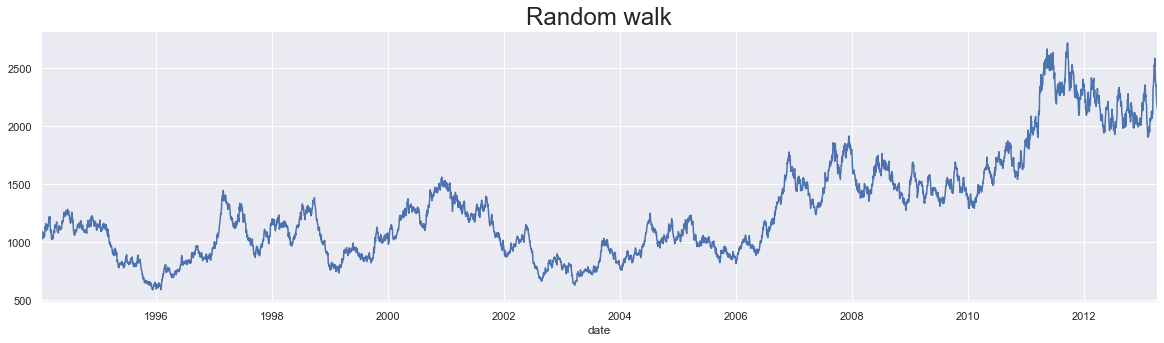

In [14]:
df.rw.plot(figsize=(20, 5))
plt.title('Random walk', size=24)
plt.show()


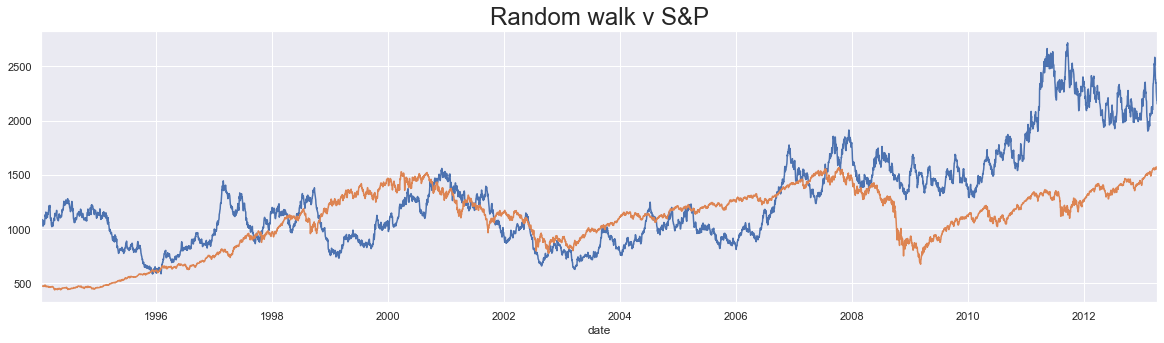

In [15]:
df.rw.plot(figsize=(20, 5))
df.market_value.plot()
plt.title('Random walk v S&P', size=24)
plt.show()

## Stationarity

Covariance stationarity (weak stationarity)- Taking same intervals from time-series should have same covariance regardless of starting point

Cov(x1, x4) = Cov(x2, x5)

In [17]:
# Determining weak form stationarity - Dickey-Fuller test
sts.adfuller(df.market_value)

(-1.7369847452352438,
 0.4121645696770621,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [18]:
sts.adfuller(df.wn)

(-69.66079392136587,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70900.63169632063)

In [19]:
sts.adfuller(df.rw) # random walk are expected to be non-stationary process

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Seasonality

Trends that appear on certain cyclical basis

"Naive" decomposition can be:

Additive 

observed = trend + seasonal + residual

Multiplicative

observed = trend * seasonal * residual

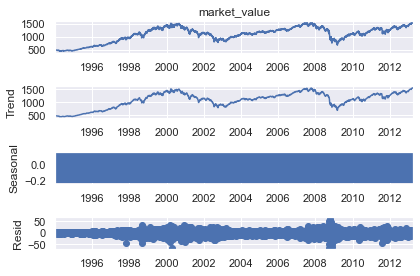

In [22]:
s_decomposition_additive = seasonal_decompose(df.market_value, model='additive')
s_decomposition_additive.plot()
plt.show()

# results suggest no seasonality data


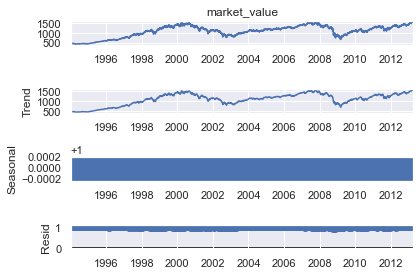

In [23]:
s_decomposition_multiplicative = seasonal_decompose(df.market_value, model='multiplicative')
s_decomposition_multiplicative.plot()
plt.show()

## Correlation between past and present values

Correlation measures the similarity in the change of values of two series

Autocorrelation is the correlation between the values of the time series and a lagged version of itself.

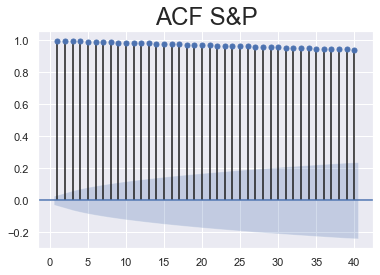

In [24]:
# ACF - autocorrelation function
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title('ACF S&P', size=24)
plt.show()

# results suggests auto-correlation

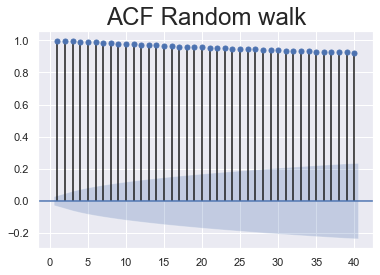

In [25]:
sgt.plot_acf(df.rw, lags=40, zero=False)
plt.title('ACF Random walk', size=24)
plt.show()

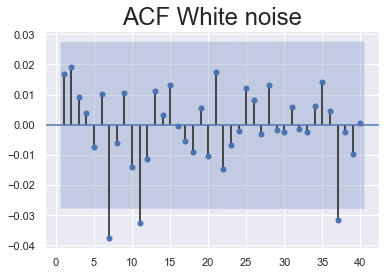

In [27]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.title('ACF White noise', size=24)
plt.show()

## PACF - Partial auto-correlation function


ACF measures the accumulated effects past lags have on the current value, while the PACF measures the direct effects

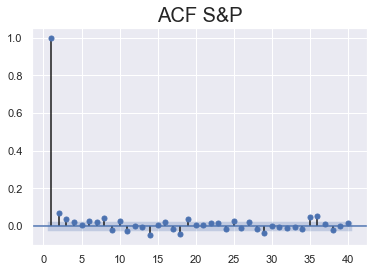

In [28]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method=('OLS')) # method order of least squares
plt.title('ACF S&P', size=20)
plt.show()

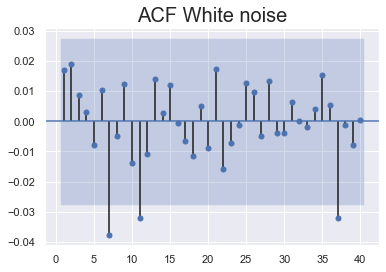

In [29]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('OLS')) 
plt.title('ACF White noise', size=20)
plt.show()

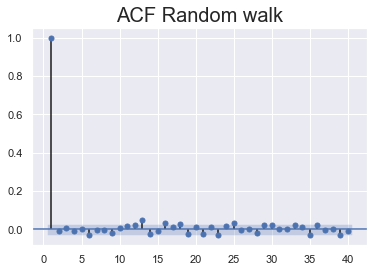

In [30]:
sgt.plot_pacf(df.rw, lags=40, zero=False, method=('OLS')) 
plt.title('ACF Random walk', size=20)
plt.show()

## Picking the right model

Start with simple model and expand it

1. Significant coefficients

2. Parsimonius (as simple as possible) - log-likelihood ratio test

3. Residuals should resemble white noise


If we're comparing two models and we want to choose the better fit, then we choose the one with higher log-likelihood and lower information criteria